This is for research paper so make proper graphs to adds it's ssc and model.py separate files for 1. flask 2. tensorflow lite

##Find missing&edit csv

In [ ]:
import pandas as pd 
df = pd.read_csv('/content/spam_ham_dataset.csv') 
df.head(5) 

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.drop(df.filter(regex="Unname"),axis=1, inplace=True) #drop all the columns whose name contains the word "Unname"
df.head(5)
#or this to drop specific column 
#df.drop(['Unnamed: 0'], axis=1,inplace=True) 
#df.head(5) 

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df=df.set_index('label') #index = false krk jisse index column remove ho jae
# fr output me esi csv file chahiye jo label 0,1 de and text input le
df.head() 

In [ ]:
df=df.drop(labels=None, axis=0, index=None, level=False, inplace=False, errors='raise')

remove index = false or csv prediction k baad m bhi bnani h

In [ ]:
df.isnull()  

,label,text,label_num
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
5166,False,False,False
5167,False,False,False
5168,False,False,False
5169,False,False,False


In [ ]:
c=df.columns[df.isna().any()].tolist() 
c 

[]

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

# Data discription

In [ ]:
df.groupby('label').describe() 

label_num                                   
          count mean  std  min  25%  50%  75%  max
label                                             
ham      3672.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
spam     1499.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

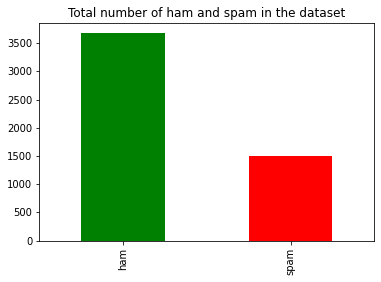

In [ ]:
import matplotlib.pyplot as plt 
df['label'].value_counts().plot.bar(color = ["g","r"]) 
plt.title('Total number of ham and spam in the dataset') 
plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


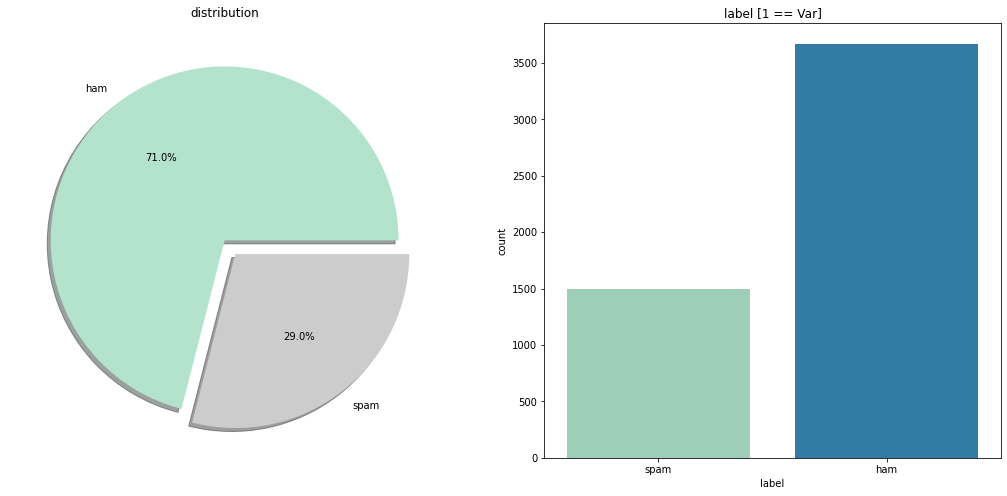

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True,cmap="Pastel2")
ax[0].set_title('distribution')
ax[0].set_ylabel('') 
import seaborn as sns
sns.countplot('label',data=df,ax=ax[1],palette="YlGnBu")
ax[1].set_title('label [1 == Var]') 
plt.show()

## Clean data

The raw E-Mails have a lot of characters beside of the ones of the alphabet, which might provoke issues later. Therefore, the E-Mails will be cleaned. Remember that it is a basic model, which won't take count of punctuation.

In [ ]:
from nltk.tokenize import RegexpTokenizer

def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')): 
    # Clean a string with RegexpTokenizer
    string = string.lower() 
    tokens = reg.tokenize(string) 
    return " ".join(tokens) 

print('Before cleaning:')
df['text'][0]                            

Before cleaning:


"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [ ]:
print('After cleaning:')
clean_str(df['text'][0]) 

After cleaning:


'subject enron methanol meter this is a follow up to the note i gave you on monday preliminary flow data provided by daren please override pop s daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed asap for economics purposes'

In [ ]:
# Create a new column with the cleaned messages
df['text_clean'] = df['text'].apply(lambda string: clean_str(string))

# Display the result 
df.head() 

,label,text,label_num,text_clean
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter this is a follow ...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom for january see attached file ...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho we re around to ...
3,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop windows office cheap main tr...
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject re indian springs this deal is to book...


to convert text to vector 
- count vectorizer 
- tf-id vectorizer

In [ ]:
# Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df.text_clean)

# Get the categories
y = df.label

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
x = tv.fit_transform(df.text_clean)

y=df.label

# Train model

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y) 

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() 
model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
result = model.predict(X_test)
result

array(['ham', 'spam', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

iski csv bna like ek trh 0,1(for spam) and dusri trf text jo input aya

In [ ]:
model.score(X_test,y_test)

1.0

CPU time - how many seconds the CPU was busy 


Wall time - actual time, usually measured in seconds, that a program takes to run or to execute its assigned tasks. Wall clock time measures how much time has passed, as if you were looking at the clock on your wall.

In [ ]:
%%time 
pred = model.predict(X_test)

CPU times: user 2.2 ms, sys: 2 µs, total: 2.2 ms
Wall time: 2.21 ms


In [ ]:
#Accuracy Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       927
        spam       1.00      1.00      1.00       366

    accuracy                           1.00      1293
   macro avg       1.00      1.00      1.00      1293
weighted avg       1.00      1.00      1.00      1293



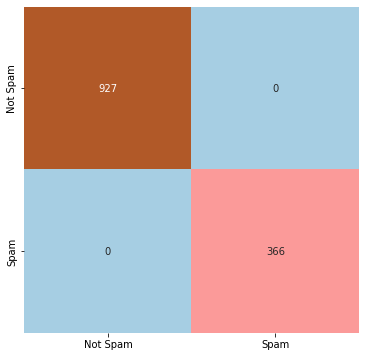

In [ ]:
#confusion matrix
import seaborn as sns
cmat = confusion_matrix(y_test, pred)
plt.figure(figsize = (6, 6))
sns.heatmap(cmat, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

In [ ]:
#https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
#Pipeline(steps=[('standardscaler', StandardScaler()),
#               ('logisticregression', LogisticRegression())])

pipe.score(X_test, y_test)  #96%

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y) 
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(x,y)
model2.score(x_test,y_test)

0.9938128383604021

In [ ]:
print(model2.coef_)
print(model2.intercept_)

[[0.04165891 0.00805725 0.0043664  ... 0.02063643 0.06555977 0.00823804]]
[0.72849046]


In [ ]:
%%time
pred = model2.predict(x_test)

CPU times: user 2.37 ms, sys: 0 ns, total: 2.37 ms
Wall time: 2.4 ms


In [ ]:
#Accuracy Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ham       1.00      0.99      1.00       932
        spam       0.98      1.00      0.99       361

    accuracy                           0.99      1293
   macro avg       0.99      0.99      0.99      1293
weighted avg       0.99      0.99      0.99      1293



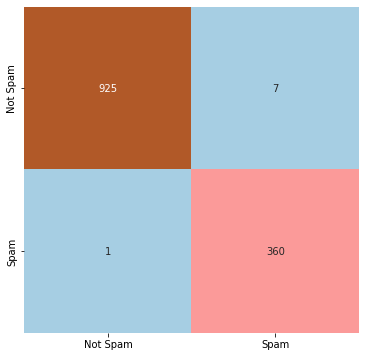

In [ ]:
import seaborn as sns
cmat = confusion_matrix(y_test, pred)
plt.figure(figsize = (6, 6))
sns.heatmap(cmat, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

In [ ]:
count_vect = CountVectorizer() 
check = count_vect.fit_transform(['Ok lar... Joking wif u oni...']) 
check.toarray()

array([[1, 1, 1, 1, 1]])

In [ ]:
tfidf_transformer = TfidfVectorizer() 
check2 = tfidf_transformer.fit_transform(['Ok lar... Joking wif u oni...']) 
check2.toarray()[:2]
model2.predict(check2)

array([[0.4472136, 0.4472136, 0.4472136, 0.4472136, 0.4472136]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()
model3.fit(X,y) 
model3.score(X_test,y_test) 

0.5955143078112916

In [ ]:
%%time
pred = model3.predict(X_test)

CPU times: user 2.54 ms, sys: 0 ns, total: 2.54 ms
Wall time: 2.62 ms


In [ ]:
model4 = MultinomialNB()
model4.fit(x,y) 
model4.score(x_test,y_test) 

0.9265274555297757

In [ ]:
%%time
pred = model4.predict(x_test)

CPU times: user 2.08 ms, sys: 0 ns, total: 2.08 ms
Wall time: 2.09 ms


In [ ]:
#Accuracy Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       932
        spam       1.00      0.74      0.85       361

    accuracy                           0.93      1293
   macro avg       0.95      0.87      0.90      1293
weighted avg       0.93      0.93      0.92      1293



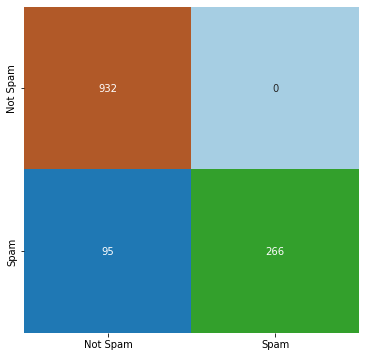

In [ ]:
import seaborn as sns
cmat = confusion_matrix(y_test, pred)
plt.figure(figsize = (6, 6))
sns.heatmap(cmat, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model5=DecisionTreeClassifier()
model5.fit(x,y)
model5.score(x,y)

1.0

In [ ]:
%%time
pred = model5.predict(x_test)

CPU times: user 6.69 ms, sys: 0 ns, total: 6.69 ms
Wall time: 6.97 ms


In [ ]:
#Accuracy Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       932
        spam       1.00      1.00      1.00       361

    accuracy                           1.00      1293
   macro avg       1.00      1.00      1.00      1293
weighted avg       1.00      1.00      1.00      1293



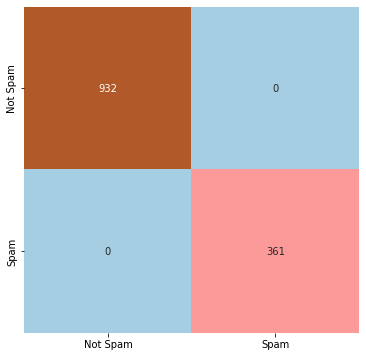

In [ ]:
import seaborn as sns
cmat = confusion_matrix(y_test, pred)
plt.figure(figsize = (6, 6))
sns.heatmap(cmat, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

In [ ]:
model6=DecisionTreeClassifier()
model6.fit(X,y)
model6.score(X,y)

1.0

In [ ]:
%%time
pred = model6.predict(x_test)

CPU times: user 3.21 ms, sys: 1.07 ms, total: 4.28 ms
Wall time: 5.5 ms


# Graphs

see for all above algo's -

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot() 
plt.show()

In [ ]:
y_test=list(y_test)
plt.plot(y_test, color="yellow",label='Actual Value')
plt.plot(pred, color= "red" ,label="Predicted value")
plt.title("Actual Vs predicted value") 
plt.ylabel('Spam/Ham')
plt.show()

## Comparison

In [ ]:
models = { 
    "MultinomialNB": {"model":MultinomialNB(), "perf":0},
    "Logistic Regr.": {"model":LogisticRegression(), "perf":0},
    "Decision Tree": {"model":DecisionTreeClassifier(), "perf":0},
}
from time import perf_counter
for name, model in models.items():
    start = perf_counter()
    model['model'].fit(X_train, y_train)
    duration = perf_counter() - start
    duration = round(duration,2)
    model["perf"] = duration
    print(f"{name:20} trained in {duration} sec")

MultinomialNB        trained in 0.02 sec


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regr.       trained in 1.24 sec
Decision Tree        trained in 1.74 sec


In [ ]:
from time import perf_counter
for name, model in models.items():
    start = perf_counter()
    model['model'].fit(x_train, y_train)
    duration = perf_counter() - start
    duration = round(duration,2)
    model["perf"] = duration
    print(f"{name:20} trained in {duration} sec")

MultinomialNB        trained in 0.02 sec
Logistic Regr.       trained in 0.36 sec
Decision Tree        trained in 0.67 sec


In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Accuracy w/o scaling', data = df)
plt.title('Accuracy on the test set\n(the Y-Axis is between 0.8 and 1.0)', fontsize = 15)
plt.ylim(0.8,1)
plt.show()

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Training time (sec)', data = df)
plt.title('Training time for each model in sec', fontsize = 15)
plt.ylim(0,20)
plt.show()

Pridiction examples

In [ ]:
from IPython.display import Markdown, display
def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))

def display_result(df, number=2):
    for i in range(number):
        msg = df['text_clean'].iloc[i]
        label = df["label"].iloc[i]
        msg_vec = cv.transform([msg]) 
        pred_label = model.predict(msg_vec)
        printmd(f"**Real: {label}, Predicted: {pred_label[0]}**")
        printmd(f"**E-Mail:** {msg}")
        printmd("_______________________________________________________________")
    
df_spam = df[df['label'] == 'spam']
df_ham = df[df['label'] == 'ham']
display_result(df_spam)
display_result(df_ham)

# Comparison of both vectorizers

# Save model

In [ ]:
import pickle
saved_model=pickle.dumps(model5)
#to check if knowledge has been stored in dump pickle file & is working :-
modelfrom_pickle = pickle.loads(saved_model)    
y_pred=modelfrom_pickle.predict(X_test) 
print(accuracy_score(y_test,y_pred)) 

In [ ]:
import joblib
joblib.dump(model5,'pickle.pkl') # name the file & save it
# X below is variable jo upr cv.fit_tranform ko store kra where cv=CountVectorizer() 
#for eg. check hai upr for model but hm lenge model5 or 6 bcz that's giving us 1 score
joblib.dump(X,'transform.pkl') # making a file which will convert user's entry to numeric form 

# BERT

In [ ]:
df.groupby('label').describe()

label_num                                   
          count mean  std  min  25%  50%  75%  max
label                                             
ham      3672.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
spam     1499.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [ ]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [ ]:
1499/5171

0.2898859021465867

28.9% spam and 71.1% ham. This indicates data imbalance

In [ ]:
df_spam = df[df['label']=='spam']
df_spam.shape 

(1499, 4)

In [ ]:
df_ham = df[df['label']=='ham']
df_ham.shape 

(3672, 4)

In [ ]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape 

(1499, 4)

In [ ]:
df_balanced = pd.concat([df_ham_downsampled, df_spam])
df_balanced.shape

(2998, 4)

In [ ]:
df_balanced['label'].value_counts()

ham     1499
spam    1499
Name: label, dtype: int64

In [ ]:
df_balanced.describe()

,label_num
count,2998.000000
mean,0.500000
std,0.500083
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
df_balanced.head(5)

,label,text,label_num,text_clean
456,ham,Subject: pictures !\r\npictures of daddy ' s l...,0,subject pictures pictures of daddy s little gi...
4434,ham,Subject: new sitara desk request\r\nthis needs...,0,subject new sitara desk request this needs to ...
4039,ham,Subject: mcmullen line maintenance\r\nfrom thi...,0,subject mcmullen line maintenance from this mo...
1791,ham,Subject: updated buyback list\r\nwestvaco is a...,0,subject updated buyback list westvaco is a bra...
3481,ham,Subject: revision # 1 - enron / hpl actuals fo...,0,subject revision enron hpl actuals for sept se...


In [ ]:
df_balanced.drop(['text'], axis=1,inplace=True)

In [ ]:
df_balanced.tail(5)

,label,label_num,text_clean
5159,spam,1,subject pictures streamlined denizen ajar chas...
5161,spam,1,subject penny stocks are about timing nomad in...
5162,spam,1,subject anomaly boys from uosda apaproved mled...
5164,spam,1,subject slutty milf wants to meet you take tha...
5170,spam,1,subject important online banking alert dear va...


In [ ]:
#df_balanced.replace({'text_clean': 'email_msg'}, inplace=True)
df_balanced.tail(5)

,label,label_num,text_clean
5159,spam,1,subject pictures streamlined denizen ajar chas...
5161,spam,1,subject penny stocks are about timing nomad in...
5162,spam,1,subject anomaly boys from uosda apaproved mled...
5164,spam,1,subject slutty milf wants to meet you take tha...
5170,spam,1,subject important online banking alert dear va...


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_balanced['text_clean'],df_balanced['label_num'], stratify=df_balanced['label_num'])
X_train.head(4)

4483    subject hi daren i m attempting to clear the a...
705     subject fw intrastate gas fyi from legal origi...
1968    subject crony vicodin francis absolutely the c...
4175    subject re guadalupe meter diagram daren here ...
Name: text_clean, dtype: object

In [ ]:
len(X_train)

In [ ]:
len(X_test)

750

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
!pip install -U tensorflow-text==2.6.0

In [ ]:
import tensorflow_text as text

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
# building sequencial model
# Bert layers 
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output']) 
#DropoutLayer - Dropout Regularization - some might beb biased with input features toh overfiiting remove
#pooledEncoding-shape-no. of txt, words,word embedding vector size
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()
# Non trainable params are comming from bert and we need not to retrain them
# trainable param is final se phle layer me jitne box vo param - trainable

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        {'input_mask': (None 0           text[0][0]                       
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      {'encoder_outputs':  109482241   keras_layer[0][0]                
                                                                 keras_layer[0][1]                
                                                                 keras_layer[0][2]                
______________________________________________________________________________________________

In [ ]:
len(X_train)

2248

In [ ]:
METRICS = [ 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
] 
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS) 

In [ ]:
model.fit(X_train, y_train, epochs=10)  

Epoch 1/10
71/71 [==============================] - 682s 9s/step - loss: 0.6493 - accuracy: 0.6197 - precision: 0.6256 - recall: 0.5961
Epoch 2/10
71/71 [==============================] - 666s 9s/step - loss: 0.5825 - accuracy: 0.6913 - precision: 0.6980 - recall: 0.6744
Epoch 3/10
71/71 [==============================] - 664s 9s/step - loss: 0.5392 - accuracy: 0.7300 - precision: 0.7302 - recall: 0.7295
Epoch 4/10
71/71 [==============================] - 664s 9s/step - loss: 0.4971 - accuracy: 0.7807 - precision: 0.7855 - recall: 0.7722
Epoch 5/10
71/71 [==============================] - 665s 9s/step - loss: 0.4809 - accuracy: 0.7816 - precision: 0.7808 - recall: 0.7829
Epoch 6/10
71/71 [==============================] - 666s 9s/step - loss: 0.4484 - accuracy: 0.8270 - precision: 0.8338 - recall: 0.8167
Epoch 7/10
71/71 [==============================] - 664s 9s/step - loss: 0.4306 - accuracy: 0.8319 - precision: 0.8330 - recall: 0.8301
Epoch 8/10
71/71 [==============================

In [ ]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 225s 9s/step - loss: 0.3654 - accuracy: 0.8787 - precision: 0.9011 - recall: 0.8507


[0.36541008949279785,
 0.8786666393280029,
 0.901129961013794,
 0.8506666421890259]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[196, 179],
       [203, 172]])

Text(33.0, 0.5, 'Truth')

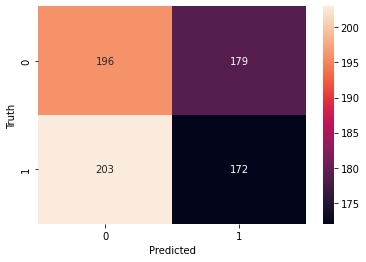

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.49      0.52      0.51       375
           1       0.49      0.46      0.47       375

    accuracy                           0.49       750
   macro avg       0.49      0.49      0.49       750
weighted avg       0.49      0.49      0.49       750



In [ ]:
check = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
] 
model.predict(check)

array([[0.39981592],
       [0.37098128],
       [0.33916909],
       [0.31377938],
       [0.53733873]], dtype=float32)

Make different version of models


In [ ]:
model.save("saved_model/1/")

In [ ]:
model.save("saved_model/2/")

In [ ]:
model.save("saved_model/3/")